In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc
import platform
import matplotlib as mpl
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
import statsmodels
from patsy import dmatrices

In [29]:
font_location = 'C:/Users/yeonn/AppData/Local/Microsoft/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc' 
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [30]:
df=pd.read_csv('incheon_cafe.csv')

In [31]:
keward=[ '인테리어가 멋져요', '커피가 맛있어요', '친절해요', '디저트가 맛있어요', '대화하기 좋아요', '매장이 청결해요',
       '음료가 맛있어요', '특별한 메뉴가 있어요', '빵이 맛있어요', '반려동물과 가기 좋아요', '음식이 맛있어요',
       '메뉴 구성이 알차요', '건강한 맛이에요', '뷰가 좋아요', '아늑해요', '가성비가 좋아요', '화장실이 깨끗해요',
       '양이 많아요', '컨셉이 독특해요', '사진이 잘 나와요', '매장이 넓어요', '좌석이 편해요', '야외 공간이 멋져요',
       '주차하기 편해요', '종류가 다양해요', '아이와 가기 좋아요', '읽을만한 책이 많아요', '집중하기 좋아요',
       '음악이 좋아요', '차가 맛있어요', '재료가 신선해요', '룸이 잘 되어있어요', '혼밥하기 좋아요',
       '비싼 만큼 가치있어요', '술이 다양해요', '차분한 분위기에요', '혼술하기 좋아요', '오래 머무르기 좋아요',
       '선물하기 좋아요', '주문제작을 잘해줘요', '포장이 깔끔해요', '요금제가 잘 되어있어요', '단체모임 하기 좋아요',
       '특별한 날 가기 좋아요', '음식이 빨리 나와요']
region_feature=[ '남_0~9세', '남_10~19세', '남_20~29세', '남_30~39세', '남_40~49세',
       '남_50~59세', '남_60~69세', '남_70~79세', '남_80~89세', '남_90~99세', '남_100세 이상',
       '여_0~9세', '여_10~19세', '여_20~29세', '여_30~39세', '여_40~49세', '여_50~59세',
       '여_60~69세', '여_70~79세', '여_80~89세', '여_90~99세', '여_100세 이상', '군/구',
       '면적', '외식업장개수', '버스정류장', '지하철역수', '주거상업', '주거지역', '기타지역', '상업지역',
       '주거공업', '공업 중심지역', '오피스', '커피전문점', '전체업종', '비율', '시장규모(만원)', '점포당 매출액']
keward_sale=[ '인테리어가 멋져요', '커피가 맛있어요', '친절해요', '디저트가 맛있어요', '대화하기 좋아요', '매장이 청결해요',
       '음료가 맛있어요', '특별한 메뉴가 있어요', '빵이 맛있어요', '반려동물과 가기 좋아요', '음식이 맛있어요',
       '메뉴 구성이 알차요', '건강한 맛이에요', '뷰가 좋아요', '아늑해요', '가성비가 좋아요', '화장실이 깨끗해요',
       '양이 많아요', '컨셉이 독특해요', '사진이 잘 나와요', '매장이 넓어요', '좌석이 편해요', '야외 공간이 멋져요',
       '주차하기 편해요', '종류가 다양해요', '아이와 가기 좋아요', '읽을만한 책이 많아요', '집중하기 좋아요',
       '음악이 좋아요', '차가 맛있어요', '재료가 신선해요', '룸이 잘 되어있어요', '혼밥하기 좋아요',
       '비싼 만큼 가치있어요', '술이 다양해요', '차분한 분위기에요', '혼술하기 좋아요', '오래 머무르기 좋아요',
       '선물하기 좋아요', '주문제작을 잘해줘요', '포장이 깔끔해요', '요금제가 잘 되어있어요', '단체모임 하기 좋아요',
       '특별한 날 가기 좋아요', '음식이 빨리 나와요','점포당 매출액']

# 특성분석

In [32]:
df.fillna(0,inplace=True)
df.drop(axis=1,columns='지역명',inplace=True)

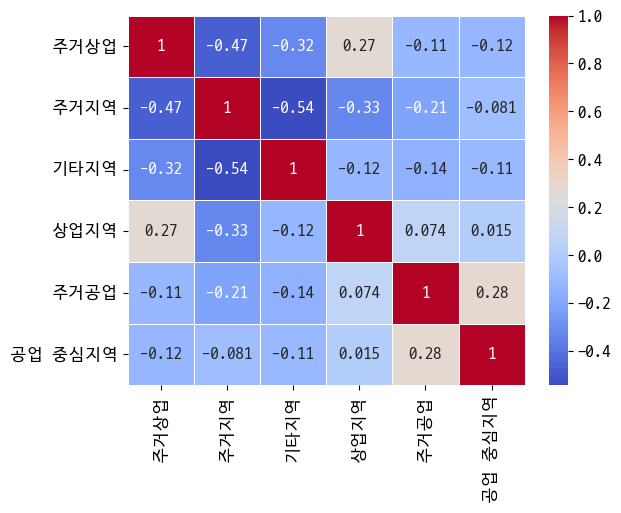

In [33]:
region=['주거상업', '주거지역', '기타지역', '상업지역','주거공업', '공업 중심지역']
region_corr=df[region].corr()
sns.heatmap(region_corr, annot=True, cmap='coolwarm', linewidths=0.7)
plt.show()

In [34]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

In [35]:
log_df=np.log1p(df[['주거상업', '주거지역', '기타지역', '상업지역','주거공업', '공업 중심지역','점포당 매출액']])

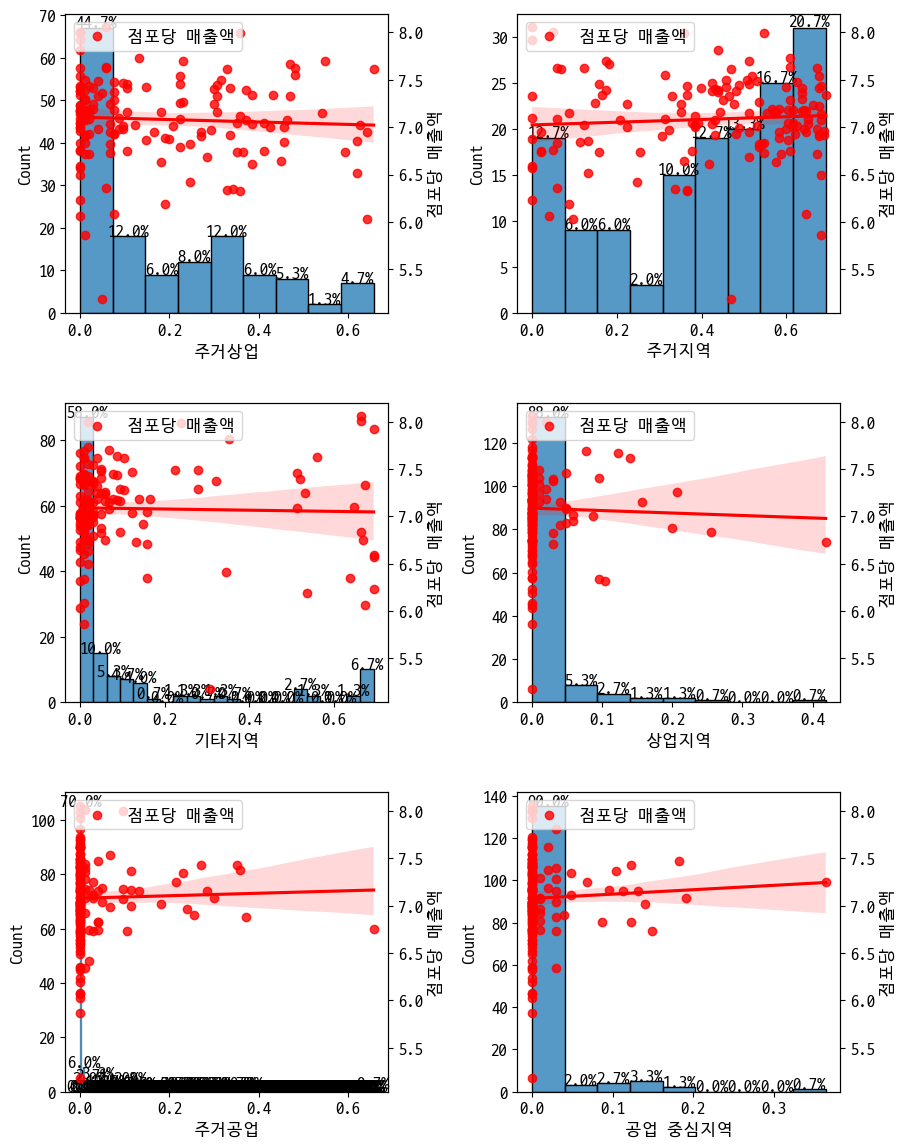

In [36]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 14))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features =  region# 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.histplot(x=feature, data=log_df, ax=ax)
    
    # 당기순이익 라인 플롯 추가 (twinx 사용)
    ax2 = ax.twinx()
    sns.regplot(x=feature, y='점포당 매출액', data=log_df, marker='o', ax=ax2, color='red')
    
    # 매출액 라인 플롯 추가 (twinx 사용)

    write_percent(ax, len(log_df))  # 퍼센트 주석 추가

    # 범례(legend) 설정
    ax2.legend(['점포당 매출액'], loc='upper left')
plt.show()

In [37]:
age=['남_0~9세',
 '남_10~19세',
 '남_20~29세',
 '남_30~39세',
 '남_40~49세',
 '남_50~59세',
 '남_60~69세',
 '남_70~79세',
 '남_80~89세',
 '남_90~99세',
 '남_100세 이상',
 '여_0~9세',
 '여_10~19세',
 '여_20~29세',
 '여_30~39세',
 '여_40~49세',
 '여_50~59세',
 '여_60~69세',
 '여_70~79세',
 '여_80~89세',
 '여_90~99세',
 '여_100세 이상']
age

['남_0~9세',
 '남_10~19세',
 '남_20~29세',
 '남_30~39세',
 '남_40~49세',
 '남_50~59세',
 '남_60~69세',
 '남_70~79세',
 '남_80~89세',
 '남_90~99세',
 '남_100세 이상',
 '여_0~9세',
 '여_10~19세',
 '여_20~29세',
 '여_30~39세',
 '여_40~49세',
 '여_50~59세',
 '여_60~69세',
 '여_70~79세',
 '여_80~89세',
 '여_90~99세',
 '여_100세 이상']

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['군/구']=le.fit_transform(df['군/구'])

#나이대가 다중공선성이 심해서 조정이 필요함

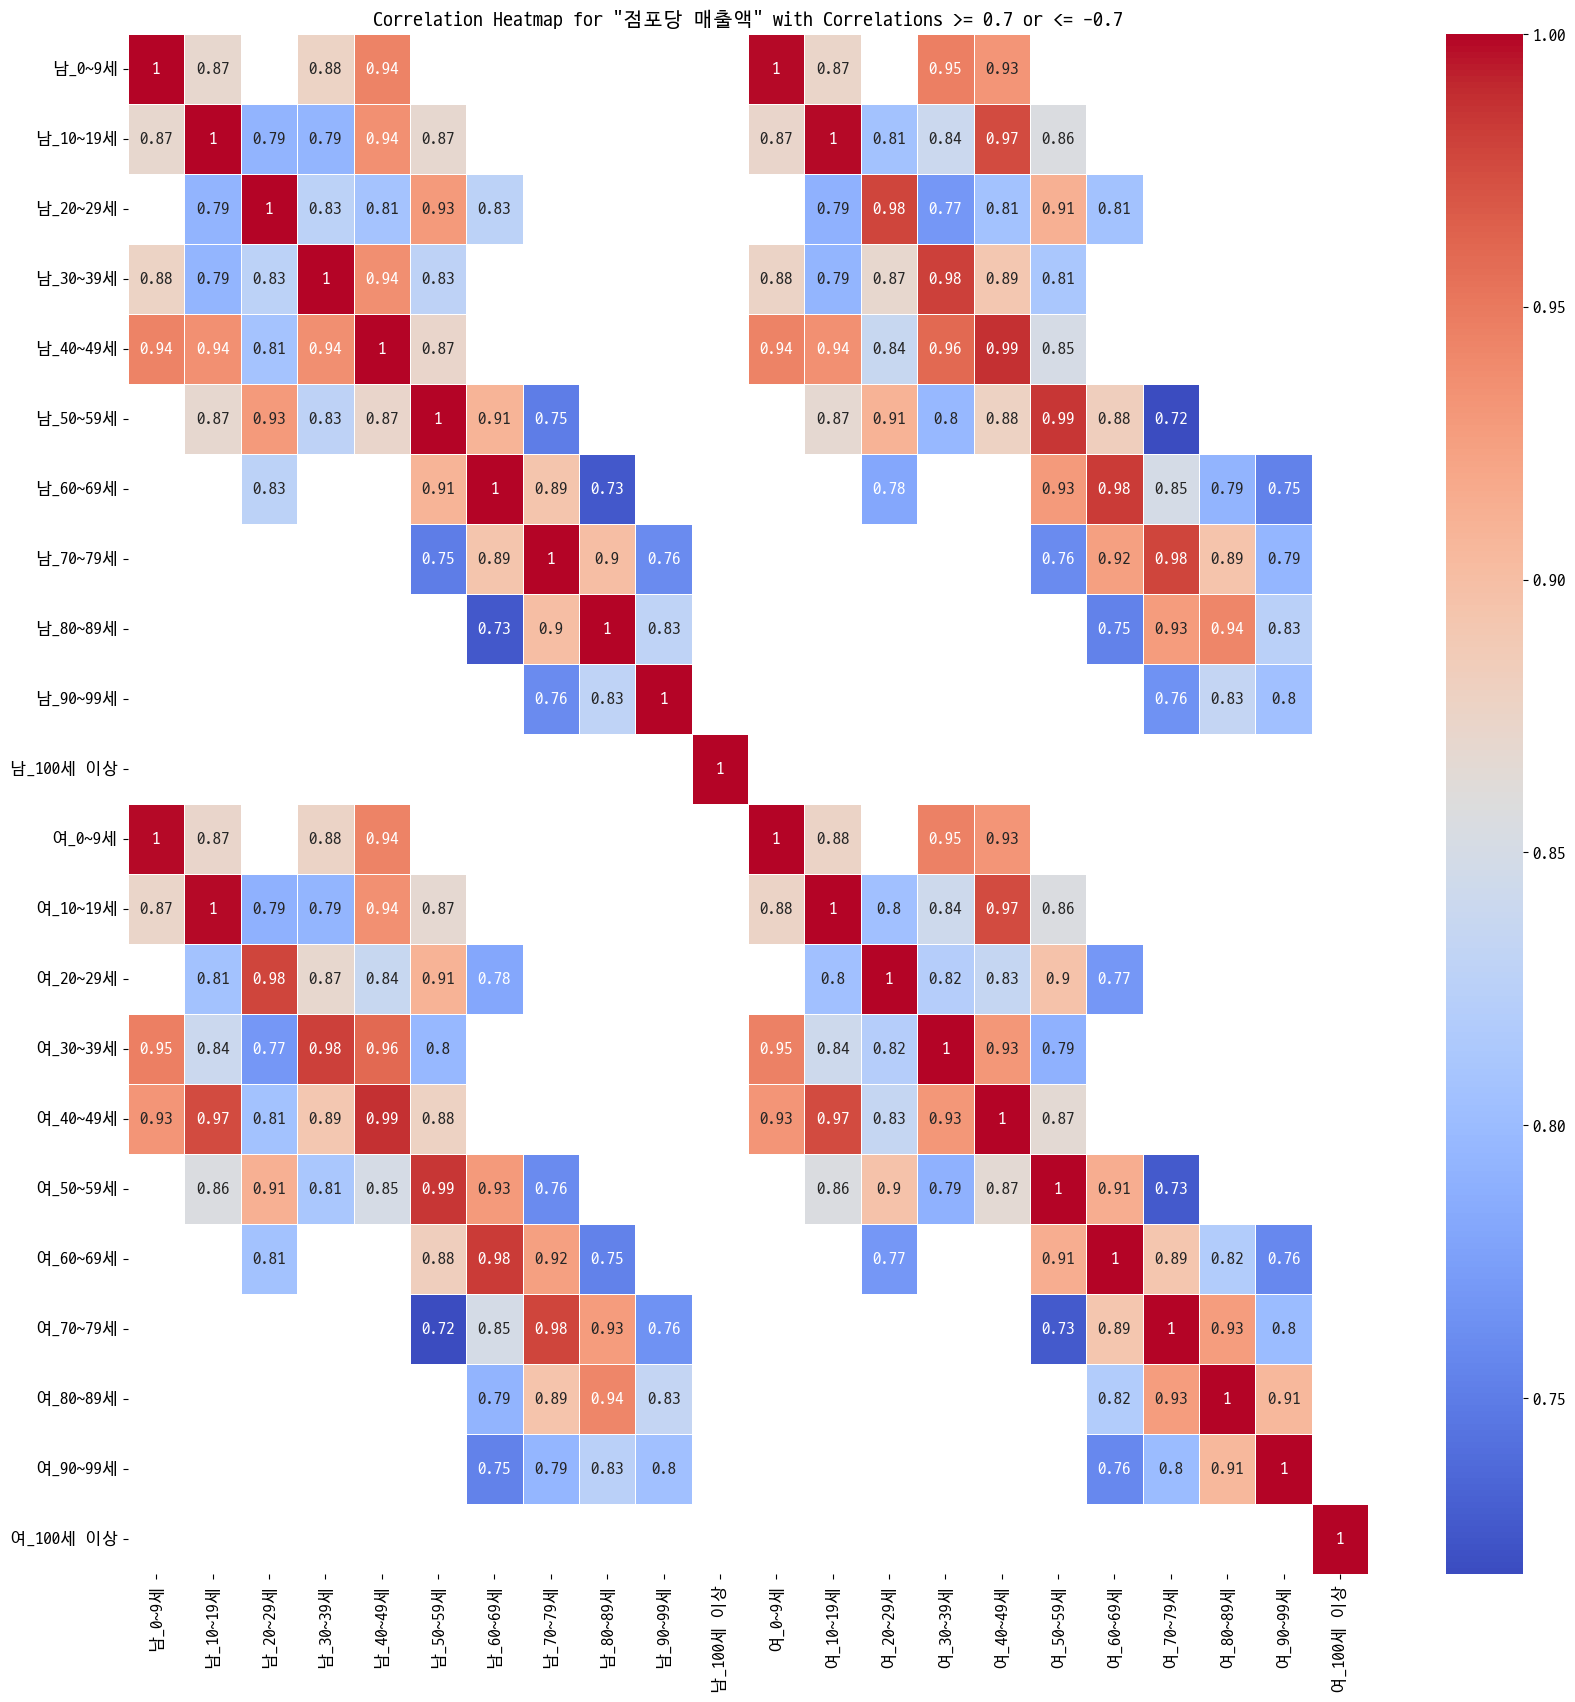

In [39]:
# '점포당 매출액'과 '매출액' 간의 상관관계 계산
# 상관계수 계산
correlation_sales = df[age].corr()

# 0.4 미만이고 -0.4 초과인 상관계수는 NaN으로 변경
correlation_sales = correlation_sales.where((correlation_sales >= 0.7) | (correlation_sales <= -0.7), other=np.nan)

plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.title('Correlation Heatmap for "점포당 매출액" with Correlations >= 0.7 or <= -0.7')
plt.show()

# 키워드 분석

In [40]:
df_keward=df[keward]

In [41]:
df[keward]

,인테리어가 멋져요,커피가 맛있어요,친절해요,디저트가 맛있어요,대화하기 좋아요,매장이 청결해요,음료가 맛있어요,특별한 메뉴가 있어요,빵이 맛있어요,반려동물과 가기 좋아요,...,차분한 분위기에요,혼술하기 좋아요,오래 머무르기 좋아요,선물하기 좋아요,주문제작을 잘해줘요,포장이 깔끔해요,요금제가 잘 되어있어요,단체모임 하기 좋아요,특별한 날 가기 좋아요,음식이 빨리 나와요
0,18,86,15,22,3,1,9,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,18,86,15,22,3,1,9,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,18,86,15,22,3,1,9,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,22,82,9,28,3,3,2,5,18,0,...,0,0,0,3,1,0,0,0,0,0
4,22,82,9,28,3,3,2,5,18,0,...,0,0,0,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,26,94,13,39,2,3,6,12,0,0,...,0,0,0,0,0,0,0,0,0,0
146,3,61,10,2,4,5,7,1,42,0,...,2,0,0,0,0,0,2,0,0,0
147,2,28,12,22,2,2,2,4,42,0,...,0,0,0,0,0,0,0,0,0,0
148,10,77,13,9,1,4,3,5,24,0,...,1,0,0,0,0,0,0,0,0,0


#키워드의 빈도수별 비율로 정규화시킴

In [42]:
# 각 행의 45개의 컬럼의 빈도수 합 계산
row_sums = df_keward.sum(axis=1)

# 각 컬럼의 값에 각 행의 빈도수 합을 나눠주기
df_keward_normalized= df_keward.div(row_sums, axis=0)
df_keward_normalized=df_keward_normalized*100
# df의 같은 행에 df_keward_normalized 값으로 업데이트하기
df.update(df_keward_normalized)

C:\Users\yeonn\AppData\Local\Temp\ipykernel_22804\3842636702.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[10.58823529 10.58823529 10.58823529 11.57894737 11.57894737 11.57894737
 11.57894737  7.          7.          7.          7.          8.26086957
  8.26086957 10.76923077 12.10526316  8.33333333  6.84210526 10.
 10.         10.         10.         10.5        10.5        10.5
  7.05882353 11.81818182  8.5         8.5         8.5         8.5
  6.15384615  4.          7.05882353  8.75        5.          5.
 12.14285714  4.16666667  8.75        4.44444444  4.44444444 15.
  1.11111111  1.11111111  1.11111111 12.94117647  6.25        8.94736842
  8.94736842  8.94736842  8.94736842  8.94736842  8.94736842  4.28571429
 15.70247934  5.          5.5         6.31578947 15.81920904 15.26315789
 13.5        12.30769231 16.          9.09090909 10.83333333 14.70588235
 14.28571429  3.88888889  6.47058824  7.64705882  

In [43]:
log_keward=np.log1p(df[keward_sale])

#컨셉이 독특해요 증가하는경향

#뷰가 좋아요 감소하는 경향

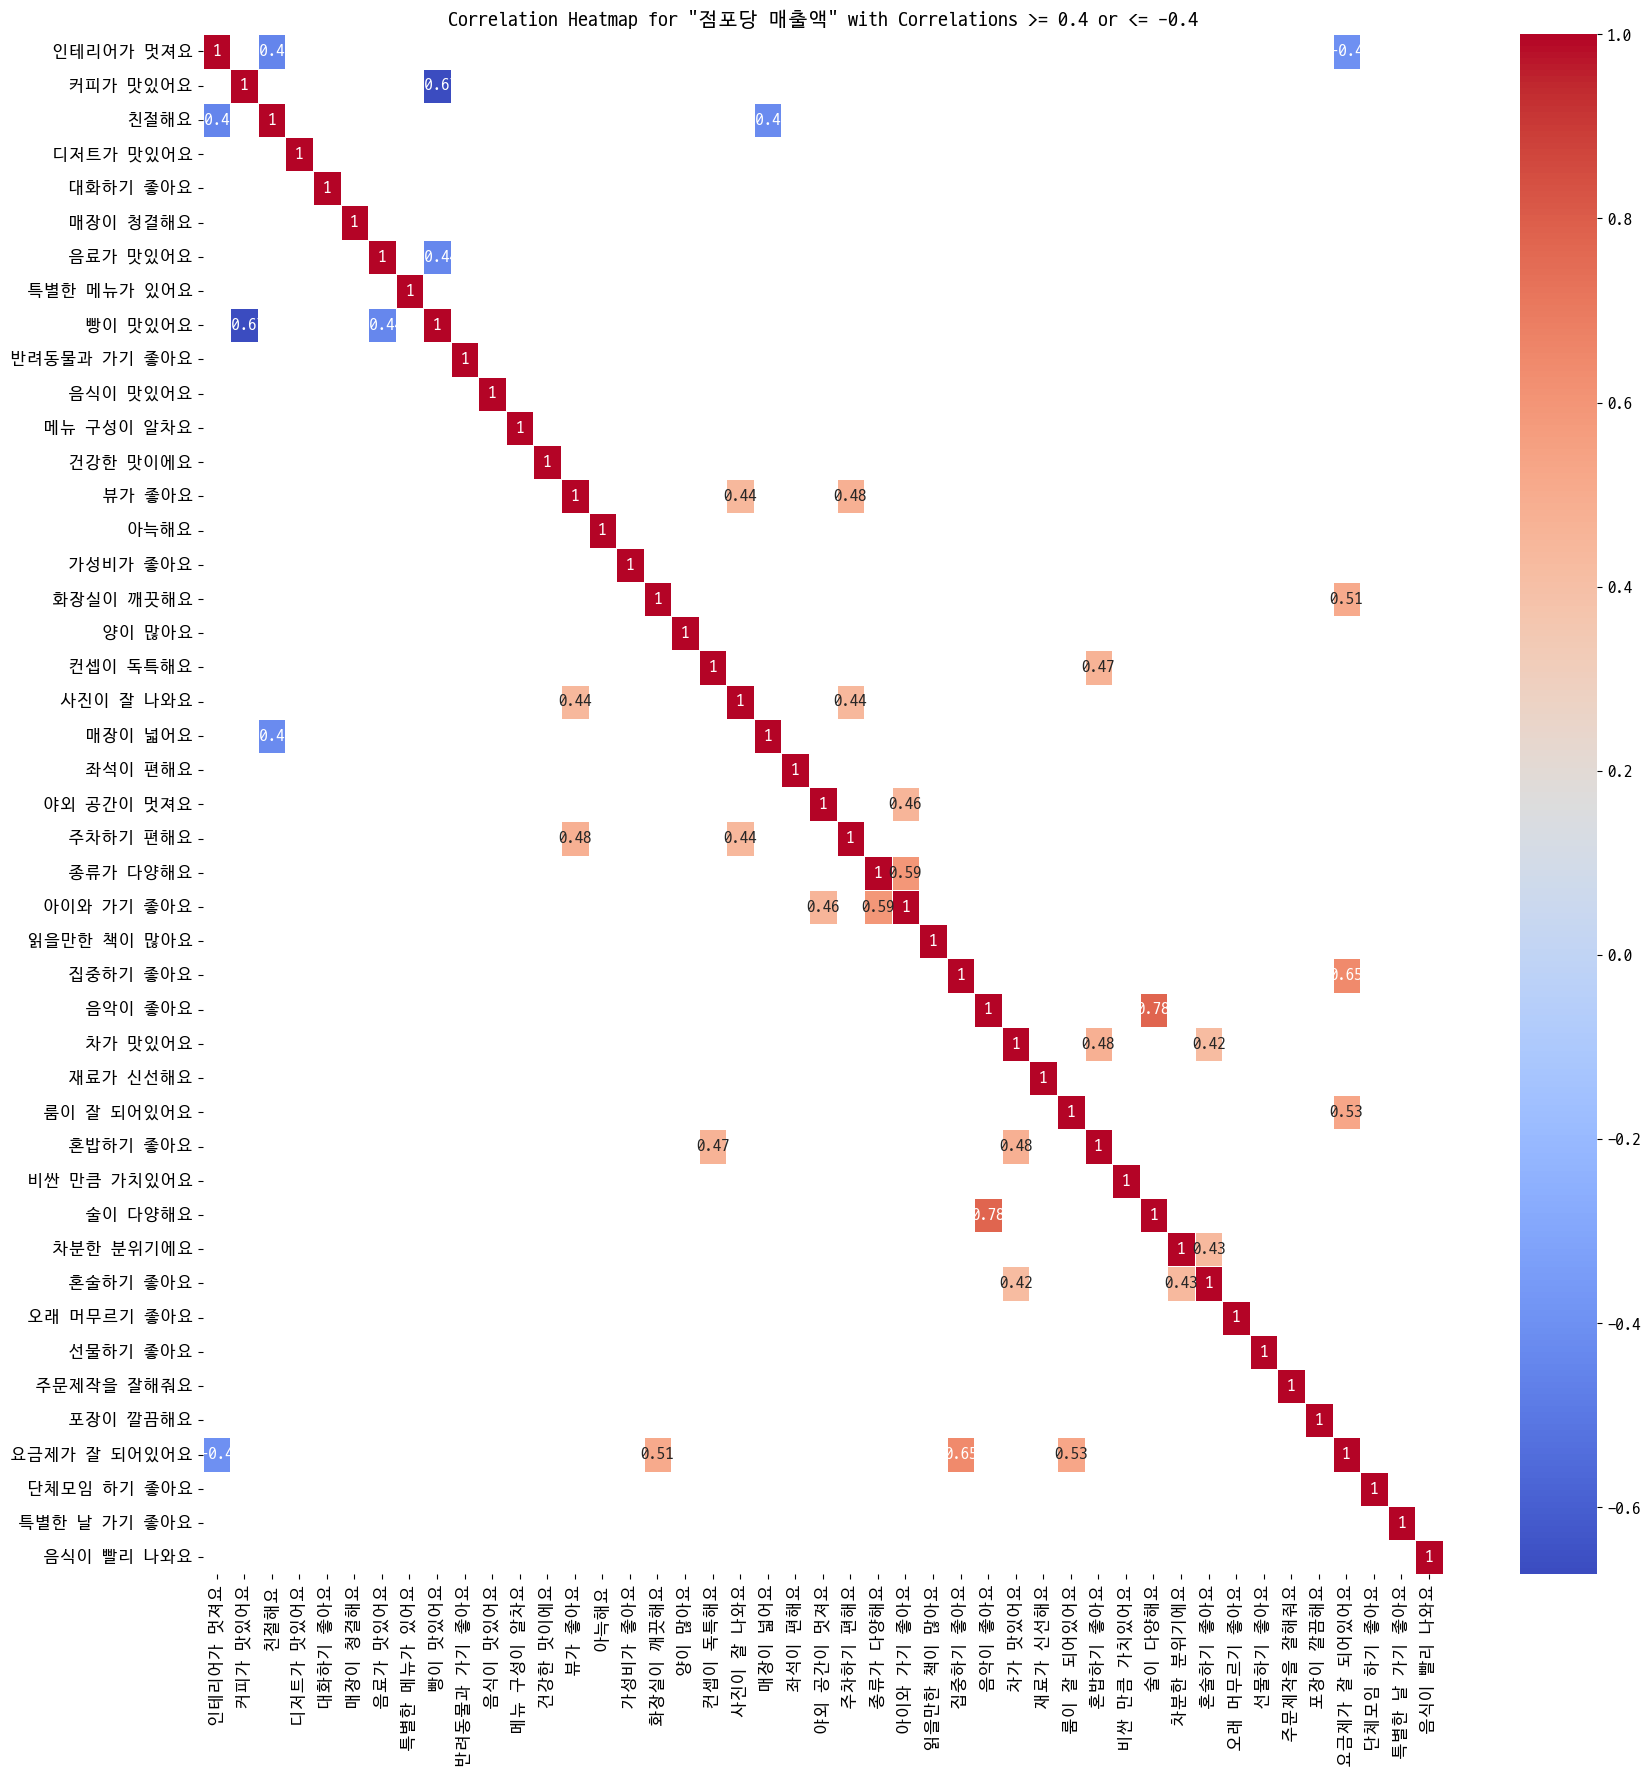

In [44]:
# 상관계수 계산
correlation_sales = df[keward].corr()

# 0.4 미만이고 -0.4 초과인 상관계수는 NaN으로 변경
correlation_sales = correlation_sales.where((correlation_sales >= 0.4) | (correlation_sales <= -0.4), other=np.nan)

plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.title('Correlation Heatmap for "점포당 매출액" with Correlations >= 0.4 or <= -0.4')
plt.show()

In [45]:
df['술,음악']=df['술이 다양해요']+df['음악이 좋아요']
df['집중,요금,룸,화장실']=df['집중하기 좋아요']+df['요금제가 잘 되어있어요']+df['룸이 잘 되어있어요']+df['화장실이 깨끗해요']
df['주차,뷰,사진']=df['주차하기 편해요']+df['뷰가 좋아요']+df['사진이 잘 나와요']
df['차분,오래']=df['차분한 분위기에요']+df['오래 머무르기 좋아요']
df['야외,아이,종류']=df['야외 공간이 멋져요']+df['아이와 가기 좋아요']+df['종류가 다양해요']
df['혼밥,차,양']=df['혼밥하기 좋아요']+df['차가 맛있어요']+df['양이 많아요']

In [46]:
df.drop(axis=1,columns=['음악이 좋아요','술이 다양해요','집중하기 좋아요','요금제가 잘 되어있어요',
                        '룸이 잘 되어있어요','화장실이 깨끗해요','주차하기 편해요','뷰가 좋아요','사진이 잘 나와요',
                       '차분한 분위기에요','오래 머무르기 좋아요','야외 공간이 멋져요','아이와 가기 좋아요',
                        '종류가 다양해요','혼밥하기 좋아요','차가 맛있어요','양이 많아요'],inplace=True)

In [47]:
df_new=[col for col in df.columns if col not in region_feature]
df_new2=[col for col in df_new if col != '지역명']
df_new2

['인테리어가 멋져요',
 '커피가 맛있어요',
 '친절해요',
 '디저트가 맛있어요',
 '대화하기 좋아요',
 '매장이 청결해요',
 '음료가 맛있어요',
 '특별한 메뉴가 있어요',
 '빵이 맛있어요',
 '반려동물과 가기 좋아요',
 '음식이 맛있어요',
 '메뉴 구성이 알차요',
 '건강한 맛이에요',
 '아늑해요',
 '가성비가 좋아요',
 '컨셉이 독특해요',
 '매장이 넓어요',
 '좌석이 편해요',
 '읽을만한 책이 많아요',
 '재료가 신선해요',
 '비싼 만큼 가치있어요',
 '혼술하기 좋아요',
 '선물하기 좋아요',
 '주문제작을 잘해줘요',
 '포장이 깔끔해요',
 '단체모임 하기 좋아요',
 '특별한 날 가기 좋아요',
 '음식이 빨리 나와요',
 '술,음악',
 '집중,요금,룸,화장실',
 '주차,뷰,사진',
 '차분,오래',
 '야외,아이,종류',
 '혼밥,차,양']

In [48]:
decline=['특별한 메뉴가 있어요','반려동물과 가기 좋아요','음식이 맛있어요','메뉴 구성이 알차요','건강한 맛이에요',
'아늑해요','가성비가 좋아요','좌석이 편해요','읽을만한 책이 많아요','비싼 만큼 가치있어요','포장이 깔끔해요','특별한 날 가기 좋아요',
'음식이 빨리 나와요','술,음악','주차,뷰,사진','야외,아이,종류']
incline=[col for col in df_new2 if col not in decline]

In [49]:
df['decline_impact']=df[decline].sum(axis=1)
df['incline_impact']=df[incline].sum(axis=1)
df.drop(axis=1,columns=decline,inplace=True)
df.drop(axis=1,columns=incline,inplace=True)

In [55]:
df.columns

Index(['남_0_9세', '남_10_19세', '남_20_29세', '남_30_39세', '남_40_49세', '남_50_59세',
       '남_60_69세', '남_70_79세', '남_80_89세', '남_90_99세', '남_100세이상', '여_0_9세',
       '여_10_19세', '여_20_29세', '여_30_39세', '여_40_49세', '여_50_59세', '여_60_69세',
       '여_70_79세', '여_80_89세', '여_90_99세', '여_100세이상', '군구', '면적', '외식업장개수',
       '버스정류장', '지하철역수', '주거상업', '주거지역', '기타지역', '상업지역', '주거공업', '공업중심지역',
       '오피스', '커피전문점', '전체업종', '비율', '시장규모', '점포당매출액', 'decline_impact',
       'incline_impact'],
      dtype='object')

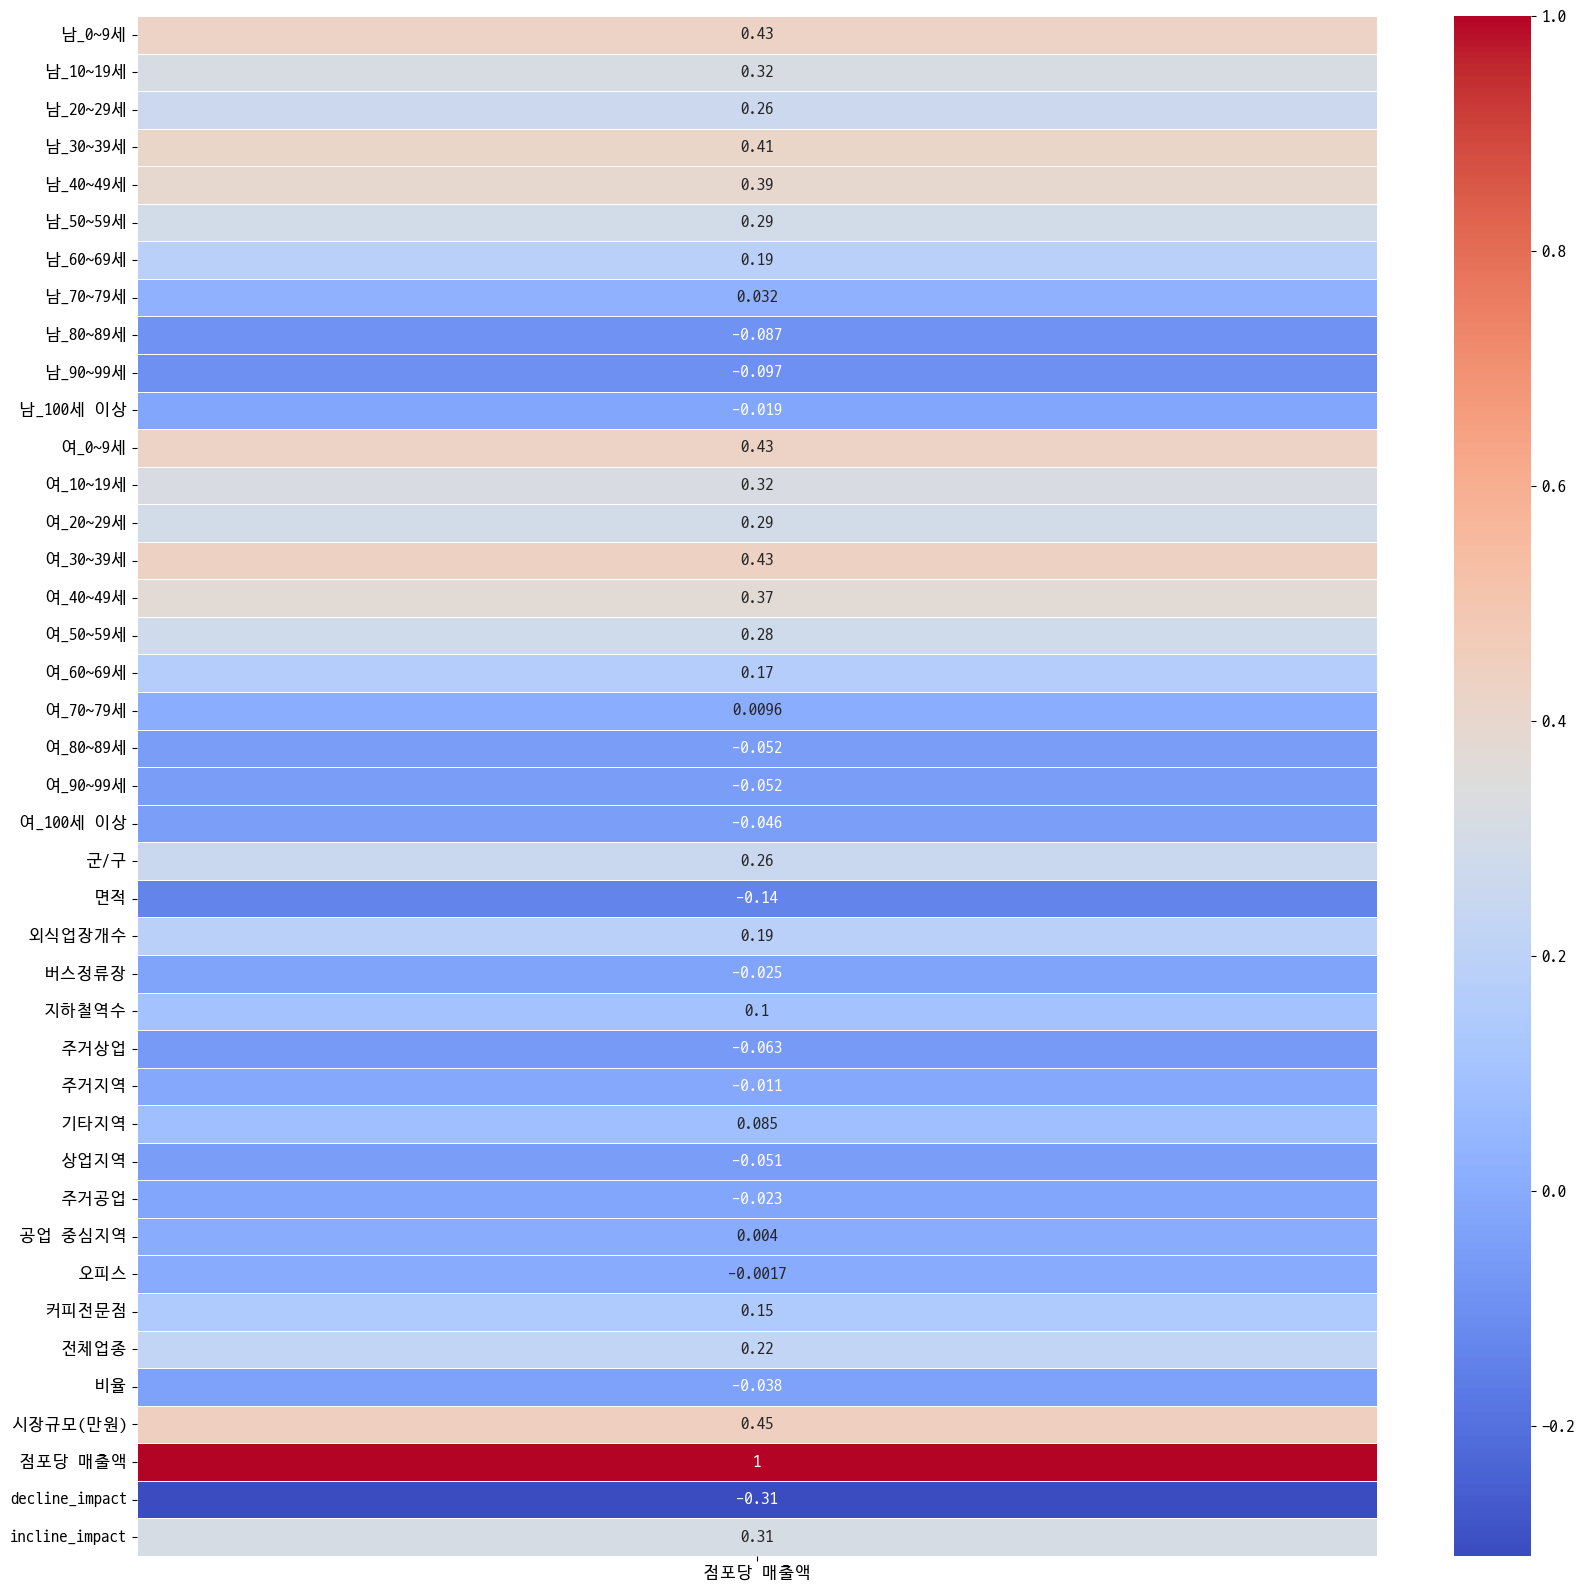

In [51]:
correlation_sales = df.corr()['점포당 매출액'].to_frame()
plt.figure(figsize=(20,20))  # 전체 Figure 크기 설정
# 히트맵 그리기
sns.heatmap(correlation_sales, annot=True, cmap='coolwarm', linewidths=0.7, mask=correlation_sales.isnull())
plt.show()

#통계적분석

##모델의 R-squared 값은 0.609로, 모델이 종속 변수의 변동성을 상당 부분 설명하고 있음을 나타냄. 그러나 일부 변수만이 통계적으로 유의한 것으로 나타났으며, 특히 면적, 커피전문점, 전체업종, 시장규모 변수가 유의한 영향을 미치고 있음을 알 수 있음--> 다중공선성 해결해야함

In [52]:
df.columns = [ '남_0_9세', '남_10_19세', '남_20_29세', '남_30_39세', '남_40_49세',
              '남_50_59세', '남_60_69세', '남_70_79세', '남_80_89세', '남_90_99세', '남_100세이상',
              '여_0_9세', '여_10_19세', '여_20_29세', '여_30_39세', '여_40_49세', '여_50_59세',
              '여_60_69세', '여_70_79세', '여_80_89세', '여_90_99세', '여_100세이상', '군구', '면적',
              '외식업장개수', '버스정류장', '지하철역수', '주거상업', '주거지역', '기타지역', '상업지역',
              '주거공업', '공업중심지역', '오피스', '커피전문점', '전체업종', '비율', '시장규모','점포당매출액',
              'decline_impact','incline_impact']

# 회귀 분석을 위한 디자인 매트릭스 생성
y, X = dmatrices('점포당매출액 ~ 남_0_9세 + 남_10_19세 + 남_20_29세 + 남_30_39세 + 남_40_49세 + '
                 '남_50_59세 + 남_60_69세 + 남_70_79세 + 남_80_89세 + 남_90_99세 + 남_100세이상 + '
                 '여_0_9세 + 여_10_19세 + 여_20_29세 + 여_30_39세 + 여_40_49세 + 여_50_59세 + '
                 '여_60_69세 + 여_70_79세 + 여_80_89세 + 여_90_99세 + 여_100세이상 + 군구 + 면적 + '
                 '외식업장개수 + 버스정류장 + 지하철역수 + 주거상업 + 주거지역 + 기타지역 + 상업지역 + '
                 '주거공업 + 공업중심지역 + 오피스 + 커피전문점 + 전체업종 + 비율 + 시장규모+decline_impact+incline_impact', 
                 data=df, return_type="dataframe")

# 회귀 모델 피팅
model = sm.OLS(y, X)
results = model.fit()

# 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 점포당매출액   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     4.496
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.85e-10
Time:                        11:07:54   Log-Likelihood:                -1083.7
No. Observations:                 150   AIC:                             2247.
Df Residuals:                     110   BIC:                             2368.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7765      0.984     -0.

#일반적으로 VIF값이 10이상인 경우 다중공선성이 있다고 판단

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df.drop(columns=['점포당매출액'])
# 상수항 추가
X = sm.add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          Variable          VIF
0        Intercept     0.000000
1           남_0_9세   634.914879
2         남_10_19세   390.139951
3         남_20_29세    55.382286
4         남_30_39세   334.996057
5         남_40_49세   451.859259
6         남_50_59세   248.510458
7         남_60_69세   151.155416
8         남_70_79세    95.740722
9         남_80_89세    29.604509
10        남_90_99세     5.274930
11        남_100세이상     1.506066
12          여_0_9세   626.285076
13        여_10_19세   371.861951
14        여_20_29세    97.187991
15        여_30_39세   582.301518
16        여_40_49세   803.384585
17        여_50_59세   277.813345
18        여_60_69세   177.354349
19        여_70_79세   103.297685
20        여_80_89세    41.264001
21        여_90_99세     9.270647
22        여_100세이상     1.648303
23              군구     2.164192
24              면적     6.542656
25          외식업장개수     2.901109
26           버스정류장     3.426743
27           지하철역수     2.075649
28            주거상업  1411.615757
29            주거지역  2353.333288
30      

C:\Users\yeonn\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\yeonn\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# 모델분석

#randomforest 회귀-radnomsearchCV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV

X = df.drop(columns=['점포당매출액'])
y = df['점포당매출액']

# 데이터 분할 (학습 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 랜덤 포레스트 모델 초기화
rf_model = RandomForestRegressor()

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# radomsearchCV를 사용하여 교차 검증 및 하이퍼파라미터 튜닝
rand_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, cv=5, scoring='r2')
rand_search.fit(X_train, y_train)

# 최적의 모델 및 하이퍼파라미터 출력
print("Best parameters found: ", rand_search.best_params_)

# 최적의 모델로 예측
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
r2 = r2_score(y_test, y_pred)
print(f'R^2 score after hyperparameter tuning: {r2}')

#randomforest-베이지안 하이퍼파라미터

In [ ]:
param_grid = {
    'n_estimators': (50, 200),  # (최소, 최대)
    'max_depth': (3, 10),        # (최소, 최대)
    'min_samples_split': (2, 10),# (최소, 최대)
    'min_samples_leaf': (1, 4),  # (최소, 최대)
    'max_features': (0.1, 1.0),  # (최소, 최대)
}

# BayesSearchCV를 사용하여 하이퍼파라미터 튜닝
Bayes_clf = BayesSearchCV(rf_model, param_grid, scoring='r2', n_iter=50, cv=5, verbose=1)
Bayes_clf.fit(X_train, y_train)

# 최적의 하이퍼파라미터 및 성능 출력
print('최적 하이퍼 파라미터 :', Bayes_clf.best_params_)
print('최적 정확도 :', Bayes_clf.best_score_)

# 최적의 모델을 사용하여 테스트 세트에서 예측 및 평가
best_model = Bayes_clf.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'테스트 세트에서의 RandomForest R^2 score: {r2}')

#XGB 회귀 모델-randomsearchCV

In [ ]:
from xgboost import XGBRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}
xgb_model = XGBRegressor()
rand_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=5, scoring='r2')
rand_search.fit(X_train, y_train)
best_model = rand_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2}')

#optuna xgboost 회귀 모델-모델설명력이 엄청 늘었는데,독립변수가 많아서 과적합된걸수도 있어서 adjusted-r2 같이 계산

In [ ]:
import optuna
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

def objective(trial):
    # 하이퍼파라미터 탐색 범위 지정
    param = {
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 200]),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1)
    }
    model = XGBRegressor(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return r2

# Optuna 최적화 실행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최적의 하이퍼파라미터 및 R^2 점수 출력
print("Best trial:")
print("  Value: ", study.best_trial.value)
print("  Params: ")
for key, value in study.best_trial.params.items():
    print("    {}: {}".format(key, value))

# 최적의 하이퍼파라미터로 모델 재훈련 및 조정된 R^2 계산
best_params = study.best_trial.params
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# R^2 점수 계산
r2 = r2_score(y_test, y_pred)
# Adjusted R^2 점수 계산
adjusted_r2=1-((1-r2)*(149)/(150-1-41))

# 결과 출력
print(f'R^2 score: {r2}')
print(f'Adjusted R^2 score: {adjusted_r2}')


In [ ]:
df.columns

In [ ]:
df.to_csv('매출액_회귀분석.csv', index=False, encoding='utf-8-sig')